# Notebook para Análisis de Precios de Toyota Corolla
## Configuración y Carga de Datos

In [156]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os
import joblib

In [157]:
# Configuración de MLflow
# mlflow.set_tracking_uri("http://localhost:5000")
# mlflow.set_experiment("toyota_parcial")

In [158]:
# Agregamos funciones
from helpers import histogram,boxplot,scatter_plot , limpiar_outliers_iqr , limpiar_outliers_z_core,resumen_outliers , histogram_por_lotes , boxplots_por_lotes ,bar_por_lotes,mostrar_matriz_correlacion ,pares_correlacion_altas,scatter_por_lotes ,split ,filtrar_columna_por_rango ,obtener_correlaciones_target ,correlacion_significativa

In [159]:
# Cargar dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/dodobeatle/dataeng-datos/refs/heads/main/ToyotaCorolla.csv",
    encoding="utf8",
    engine="python"
)

## Descripción del dataset

In [160]:
df.shape

(1436, 37)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [162]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357,0.056407,0.294568,0.218663,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104,0.230786,0.456007,0.413483,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [163]:
df.head(15)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,0,2000,3,4,5,210,1170,0,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
6,7,?TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,0,2000,3,4,5,210,1245,0,1,3,1,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,0,2000,3,4,5,210,1245,1,1,3,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0
8,9,?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,0,1800,3,4,5,100,1185,0,1,3,1,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,0
9,10,?TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,0,1900,3,4,5,185,1105,0,1,3,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0


## Feature extraction de Model

In [164]:
# # 1. Limpiar caracteres basura y normalizar el texto
# df['Model_Clean'] = (
#     df['Model']
#     .str.strip()                                 # quita espacios al inicio/fin
#     .str.lstrip('?')                             # quita “?” iniciales
#     .str.replace(r'\s+', ' ', regex=True)        # unifica espacios
#     .str.title()                                 # pone cada palabra con inicial mayúscula
# )

# # 2. Extraer marca (asumiendo siempre “Toyota”)
# df['Brand'] = df['Model_Clean'].str.extract(r'^(Toyota)')

# # 3. Extraer serie (por ejemplo “Corolla”)
# df['Series'] = df['Model_Clean'].str.extract(r'^Toyota\s+(\w+)')

# # 4. Extraer tamaño de motor (por ejemplo “2.0”, “1.8”)
# df['Engine_Size'] = df['Model_Clean'].str.extract(r'(\d\.\d)')

# # 5. Extraer tecnología (D4D, Vvtli, Vvtl-i, etc.)
# df['Engine_Tech'] = df['Model_Clean'].str.extract(r'\b([Dd]\d[Dd]|Vvtli|Vvtl[Ii])\b', expand=False)

# # 6. Extraer tipo de carrocería (Hatchb, 3Dr, 2/3-Doors, etc.)
# df['Body_Style'] = df['Model_Clean'].str.extract(r'\b(Hatchb|3Dr|2/3-Doors|3-Drs?)\b', expand=False)

# # 7. Extraer nivel de equipamiento/trim (Terra, Sol, Sport, Bns, etc.)
# df['Trim'] = df['Model_Clean'].str.extract(r'\b(Terra|Sol|Sport(?:\s*\w*)?|T-Sport|T Sport Bns?)\b', expand=False)

# # 8. Extraer número de puertas si aparece explícito (2/3-Doors → “2/3”, 3-Drs → “3”)
# df['Doors'] = df['Model_Clean'].str.extract(r'(\d(?:/\d)?)(?:-Doors|-Drs?)', expand=False)

# # 9. Longitud del nombre limpio
# df['Model_Len'] = df['Model_Clean'].str.len()

# # 10. Conteo de palabras
# df['Model_Words'] = df['Model_Clean'].str.split().str.len()

# # Mostrar algunas columnas resultantes
# print(df[['Model', 'Model_Clean', 'Brand', 'Series', 'Engine_Size',
#           'Engine_Tech', 'Body_Style', 'Trim', 'Doors',
#           'Model_Len', 'Model_Words']].head(10))




In [165]:
# 1. Normalizar Model
df['Model_Clean'] = (
    df['Model']
    .str.strip()
    .str.lstrip('?')
    .str.replace(r'\s+', ' ', regex=True)
    .str.title()
)

# 2. Extraer features
df['Brand']       = df['Model_Clean'].str.extract(r'^(Toyota)')
df['Series']      = df['Model_Clean'].str.extract(r'^Toyota\s+(\w+)')
df['Engine_Size'] = df['Model_Clean'].str.extract(r'(\d\.\d)')
df['Engine_Tech'] = df['Model_Clean'].str.extract(r'\b([Dd]\d[Dd]|Vvtli|Vvtl[Ii])\b', expand=False)
df['Body_Style']  = df['Model_Clean'].str.extract(
    r'\b(Hatchback|Hatchb|Sedan|Wagon|Coupe|Convertible|Mpv|Verso|Stationwagen|Sw|Station)\b',
    expand=False
)
df['Trim']        = df['Model_Clean'].str.extract(
    r'\b(Terra|Sol|Sport(?:\s*\w*)?|T-Sport|T Sport Bns?)\b',
    expand=False
)
df['Model_Len']   = df['Model_Clean'].str.len()
df['Model_Words'] = df['Model_Clean'].str.split().str.len()

# 3. Guardar Doors original
orig_doors = pd.to_numeric(df['Doors'], errors='coerce').astype('Int64')

# 4. Extraer puertas del texto
raw = df['Model_Clean'].str.extract(r'(\d(?:/\d)?)(?=\s*[-\s]?(?:Doors?|Drs?))', expand=False)
def normalize(val):
    if pd.isna(val): return pd.NA
    return max(map(int, val.split('/'))) if '/' in val else int(val)
df['Doors_extracted'] = raw.apply(normalize).astype('Int64')

# 5. Inferir por Body_Style
body_map = {
    'Sedan':4, 'Hatchback':5, 'Hatchb':5, 'Wagon':5,
    'Stationwagen':5, 'Sw':5, 'Station':5,
    'Mpv':5, 'Verso':5,
    'Coupe':3, 'Convertible':3
}
mask_inf = df['Doors_extracted'].isna() & df['Body_Style'].notna()
df.loc[mask_inf, 'Doors_extracted'] = df.loc[mask_inf, 'Body_Style'].map(body_map)

# 6. Mapeo manual si aún falta
manual_map = {'Gli':4, 'XLi':4, 'E-Four':4, 'XEi':4, '16V':4}
def assign_manual(m):
    for k,v in manual_map.items():
        if k.lower() in m.lower(): return v
    return pd.NA
mask_man = df['Doors_extracted'].isna()
df.loc[mask_man, 'Doors_extracted'] = (
    df.loc[mask_man, 'Model_Clean']
      .apply(assign_manual)
      .astype('Int64')
)

# 7. Combinar original vs extraído (tomar el mayor)
combined = pd.concat([orig_doors.fillna(0), df['Doors_extracted'].fillna(0)], axis=1).max(axis=1)
df['Doors'] = combined.replace({0: pd.NA}).astype('Int64')

# 8. **FORZAR 3 o 5 para TODAS** las filas
five_styles = {'Hatchback','Hatchb','Wagon','Stationwagen','Sw','Station','Mpv','Verso'}
def force_3_or_5(row):
    d = row['Doors']
    return d if d in (3,5) else (5 if row['Body_Style'] in five_styles else 3)

df['Doors'] = df.apply(force_3_or_5, axis=1).astype('Int64')

# 9. Limpiar auxiliar
df.drop(columns=['Doors_extracted'], inplace=True)

# 10. Resultado
print(df[['Model_Clean','Doors']].head())
print("\nDistribución de Doors:")
print(df['Doors'].value_counts(dropna=False))

                                     Model_Clean  Doors
0  Toyota Corolla 2.0 D4D Hatchb Terra 2/3-Doors      3
1  Toyota Corolla 2.0 D4D Hatchb Terra 2/3-Doors      3
2  Toyota Corolla 2.0 D4D Hatchb Terra 2/3-Doors      3
3  Toyota Corolla 2.0 D4D Hatchb Terra 2/3-Doors      3
4    Toyota Corolla 2.0 D4D Hatchb Sol 2/3-Doors      3

Distribución de Doors:
Doors
5    812
3    624
Name: count, dtype: Int64


In [166]:
# # 0. Guardar la columna Doors original como Int64 (admite NA)
# orig_doors = pd.to_numeric(df['Doors'], errors='coerce').astype('Int64')

# # 1. Detectar carrocerías y MPV/Verso
# df['Body_Style'] = df['Model_Clean'].str.extract(
#     r'\b(Hatchback|Hatchb|Sedan|Wagon|Coupe|Convertible|Mpv|Verso|Stationwagen|Sw|Station)\b',
#     expand=False
# )

# # 2. Extraer número o fracción de puertas de Model_Clean
# raw = df['Model_Clean'].str.extract(
#     r'(\d(?:/\d)?)(?=\s*[-\s]?(?:Doors?|Drs?))',
#     expand=False
# )

# def normalize(val):
#     if pd.isna(val):
#         return pd.NA
#     if "/" in val:
#         return max(int(x) for x in val.split("/"))
#     return int(val)

# df['Doors_extracted'] = raw.apply(normalize).astype('Int64')

# # 3. Inferir Doors_extracted por Body_Style si sigue NA
# body_map = {
#     'Sedan':4, 'Hatchback':5, 'Hatchb':5, 'Wagon':5,
#     'Stationwagen':5, 'Sw':5, 'Station':5,
#     'Mpv':5, 'Verso':5, 'Coupe':2, 'Convertible':2
# }
# mask_inf = df['Doors_extracted'].isna() & df['Body_Style'].notna()
# df.loc[mask_inf, 'Doors_extracted'] = df.loc[mask_inf, 'Body_Style'].map(body_map)

# # 4. Sufijos especiales si aún NA
# manual_map = {'Gli':4, 'XLi':4, 'E-Four':4, 'XEi':4, '16V':4}
# def assign_manual(m):
#     for k, v in manual_map.items():
#         if k.lower() in m.lower():
#             return v
#     return pd.NA

# mask_man = df['Doors_extracted'].isna()
# df.loc[mask_man, 'Doors_extracted'] = (
#     df.loc[mask_man, 'Model_Clean']
#       .apply(assign_manual)
#       .astype('Int64')
# )

# # 5. Combinar original y extraído: si extracted NA → usar original; si not NA → tomar max(original, extracted)
# combined = pd.concat([orig_doors.fillna(0), df['Doors_extracted'].fillna(0)], axis=1).max(axis=1)
# df['Doors'] = combined.replace({0: pd.NA}).astype('Int64')

# # 6. Para cualquier NA restante, asignar según Body_Style
# df['Doors'] = df['Doors'].fillna(
#     df['Body_Style']
#       .map(lambda bs: 5 if bs in {'Hatchback','Hatchb','Wagon','Stationwagen','Sw','Station','Mpv','Verso'} else 3)
# ).astype('Int64')

# # 7. Forzar que sólo queden 3 o 5: todo >3 → 5, todo else → 3
# df['Doors'] = df['Doors'].apply(lambda d: 5 if d > 3 else 3).astype('Int64')

# # 8. Eliminar auxiliar
# df.drop(columns=['Doors_extracted'], inplace=True)

# # 9. Mostrar resultado final
# print("Distribución final de Doors:")
# print(df['Doors'].value_counts(dropna=False))
# print("\nNulos en Doors:", df['Doors'].isna().sum())

In [167]:
df["Doors"].unique()

<IntegerArray>
[3, 5]
Length: 2, dtype: Int64

In [168]:
df.drop(columns=["Model", "Model_Clean", "Model_Len", "Model_Words"], inplace=True, axis=1, errors='ignore')
print(df.columns.tolist())

['Id', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar', 'Brand', 'Series', 'Engine_Size', 'Engine_Tech', 'Body_Style', 'Trim']


## Eliminación de valores nulos

In [169]:
# Seleccionar columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Verificar si hay valores negativos
negativos_bool = (numeric_df < 0).any()

# Convertir a DataFrame con nombre de columna y booleano
negativos_df = negativos_bool.reset_index()
negativos_df.columns = ['columna', 'tiene_valores_negativos']

# Mostrar el resultado
negativos_df

,columna,tiene_valores_negativos
0,Id,False
1,Price,False
2,Age_08_04,False
3,Mfg_Month,False
4,Mfg_Year,False
5,KM,False
6,HP,False
7,Met_Color,False
8,Automatic,False
9,cc,False


# Limpieza de datos

In [170]:
# Sacamos las columnas que no nos interesan
df = df.drop(columns=["Id"], axis=1, errors='ignore')
df

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Brand,Series,Engine_Size,Engine_Tech,Body_Style,Trim
0,13500,23,10,2002,46986,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,Toyota,Corolla,2.0,D4D,Hatchb,Terra
1,13750,23,10,2002,72937,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,Toyota,Corolla,2.0,D4D,Hatchb,Terra
2,13950,24,9,2002,41711,Diesel,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,Toyota,Corolla,2.0,D4D,Hatchb,Terra
3,14950,26,7,2002,48000,Diesel,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,Toyota,Corolla,2.0,D4D,Hatchb,Terra
4,13750,30,3,2002,38500,Diesel,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,Toyota,Corolla,2.0,D4D,Hatchb,Sol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,Petrol,86,1,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,Toyota,Corolla,1.3,NaN,Hatchb,NaN
1432,10845,72,9,1998,19000,Petrol,86,0,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,Toyota,Corolla,1.3,NaN,Hatchb,Terra
1433,8500,71,10,1998,17016,Petrol,86,0,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,Toyota,Corolla,1.3,NaN,Hatchb,Terra
1434,7250,70,11,1998,16916,Petrol,86,1,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Toyota,Corolla,1.3,NaN,Hatchb,Terra


In [171]:
# 1. Obtener el número de nulos por columna
null_counts = df.isnull().sum()

# 2. Filtrar solo columnas con al menos un nulo
null_counts = null_counts[null_counts > 0]

# 3. Mostrar el resultado
print(null_counts)



Engine_Size       8
Engine_Tech    1391
Body_Style      744
Trim            379
dtype: int64


## Detección de valores duplicados

In [172]:
def duplicados_con_indices(df):
    resultado = []

    for i in range(len(df)):
        fila_actual = df.iloc[i]
        duplicado_en = False

        for j in range(i):
            if df.iloc[j].equals(fila_actual):
                duplicado_en = j
                break

        resultado.append({'Fila': i, 'Duplicado_de': duplicado_en})

    # Convertir la lista de resultados en un DataFrame
    df_resultado = pd.DataFrame(resultado)
    return df_resultado


df_re = duplicados_con_indices(df)


In [173]:
# Crear una columna 'dup_col' que marca los duplicados según df_re
dup_col = 'Duplicado_de'
df[dup_col] = False
for idx, orig in zip(df_re['Fila'], df_re['Duplicado_de']):
	df.at[idx, dup_col] = orig

# 1) Filtrar las filas marcadas
df_dup = df.loc[df[dup_col] != False]

# 2) Sacar índices de duplicados y de sus originales
dup_idxs  = df_dup.index.tolist()
orig_idxs = df_dup[dup_col].tolist()

# 3) Unión única y ordenada de índices
all_idxs = sorted(set(dup_idxs + orig_idxs))

# 4) Extraer esas filas completas
pd.set_option('display.max_columns', None)
df_pairs = df.loc[all_idxs]

# 5) Mostrar resultado
df_pairs

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19388\286315511.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '112' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.at[idx, dup_col] = orig


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Brand,Series,Engine_Size,Engine_Tech,Body_Style,Trim,Duplicado_de
112,24950,8,1,2004,13253,Diesel,116,1,0,2000,5,4,5,234,1320,0,0,3,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,Toyota,Corolla,2.0,D4D,Verso,Sol,False
113,24950,8,1,2004,13253,Diesel,116,1,0,2000,5,4,5,234,1320,0,0,3,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,Toyota,Corolla,2.0,D4D,Verso,Sol,112


In [174]:
#Verificar si hay columnas constantes
columnas_cte = df.columns[df.nunique() == 1]
print("Columnas constantes:", columnas_cte.tolist())

Columnas constantes: ['Cylinders', 'Brand', 'Series']


In [175]:
# borrar columnas constantes
df.drop(columns=['Cylinders', 'Brand', 'Series'], axis=1, inplace=True)
df

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Engine_Size,Engine_Tech,Body_Style,Trim,Duplicado_de
0,13500,23,10,2002,46986,Diesel,90,1,0,2000,3,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,2.0,D4D,Hatchb,Terra,False
1,13750,23,10,2002,72937,Diesel,90,1,0,2000,3,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,2.0,D4D,Hatchb,Terra,False
2,13950,24,9,2002,41711,Diesel,90,1,0,2000,3,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,2.0,D4D,Hatchb,Terra,False
3,14950,26,7,2002,48000,Diesel,90,0,0,2000,3,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,2.0,D4D,Hatchb,Terra,False
4,13750,30,3,2002,38500,Diesel,90,0,0,2000,3,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,2.0,D4D,Hatchb,Sol,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,Petrol,86,1,0,1300,3,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,1.3,NaN,Hatchb,NaN,False
1432,10845,72,9,1998,19000,Petrol,86,0,0,1300,3,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1.3,NaN,Hatchb,Terra,False
1433,8500,71,10,1998,17016,Petrol,86,0,0,1300,3,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1.3,NaN,Hatchb,Terra,False
1434,7250,70,11,1998,16916,Petrol,86,1,0,1300,3,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.3,NaN,Hatchb,Terra,False


In [176]:
# Mostrar cantidad de outliers por columna
resumen = resumen_outliers(df)
resumen

,Outliers_IQR,Outliers_Zscore
Price,110,90
Age_08_04,7,68
Mfg_Month,0,0
Mfg_Year,0,99
KM,49,64
HP,11,46
Met_Color,0,0
Automatic,80,80
cc,123,1
Doors,0,0


In [177]:
# ------------------------------------------------
# Detectar columnas con valores continuos en `df`
# ------------------------------------------------

from pandas.api.types import is_float_dtype, is_integer_dtype

# Umbral mínimo de valores únicos para considerar un entero como “continuo”
INT_UNIQUE_THRESHOLD = 20

continuous_features = []
for col in df.columns:
    series = df[col]
    # Si es float, lo consideramos continuo
    if is_float_dtype(series):
        continuous_features.append(col)
    # Si es entero y tiene muchos valores únicos, también lo consideramos continuo
    elif is_integer_dtype(series) and series.nunique() > INT_UNIQUE_THRESHOLD:
        continuous_features.append(col)

print("Features continuas detectadas:")
for feat in continuous_features:
    print(f" - {feat} (dtype={df[feat].dtype}, únicos={df[feat].nunique()})")


Features continuas detectadas:
 - Price (dtype=int64, únicos=236)
 - Age_08_04 (dtype=int64, únicos=77)
 - KM (dtype=int64, únicos=1263)
 - Weight (dtype=int64, únicos=59)


In [178]:
# Define tus cortes manuales
bins   = [df['Quarterly_Tax'].min() - 1, 100, 150, 200, df['Quarterly_Tax'].max()]
labels = [1, 2, 3, 4]

# Crea la categoría
df['Tax_RangeCat'] = pd.cut(df['Quarterly_Tax'], bins=bins, labels=labels).astype(int)

# Muestra la relación entre Quarterly_Tax y la nueva categoría
print(
    df[['Quarterly_Tax', 'Tax_RangeCat']]
    .drop_duplicates()
    .sort_values('Quarterly_Tax')
    .reset_index(drop=True)
)

    Quarterly_Tax  Tax_RangeCat
0              19             1
1              40             1
2              64             1
3              69             1
4              72             1
5              85             1
6             100             1
7             163             3
8             185             3
9             197             3
10            210             4
11            234             4
12            283             4


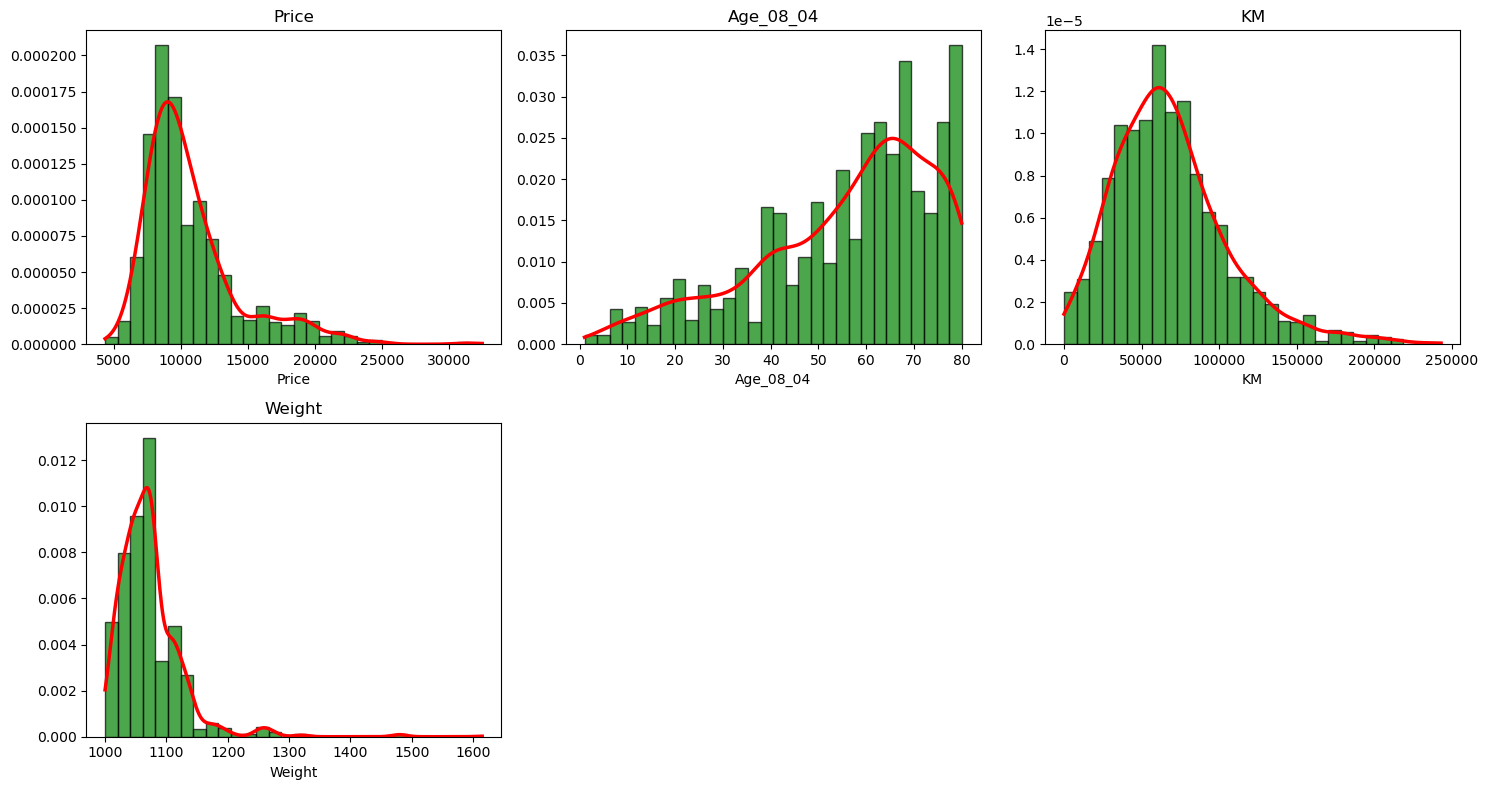

In [179]:
# Primero ponemos las continuas en un nuevo DataFrame
df_toyota_continuas = df[continuous_features].copy()

# Ahora veremos BoxPlots e Histogramas con sus curva de densidad

histogram_por_lotes(df_toyota_continuas,6)

Index(['Price', 'Age_08_04', 'KM', 'Weight'], dtype='object')


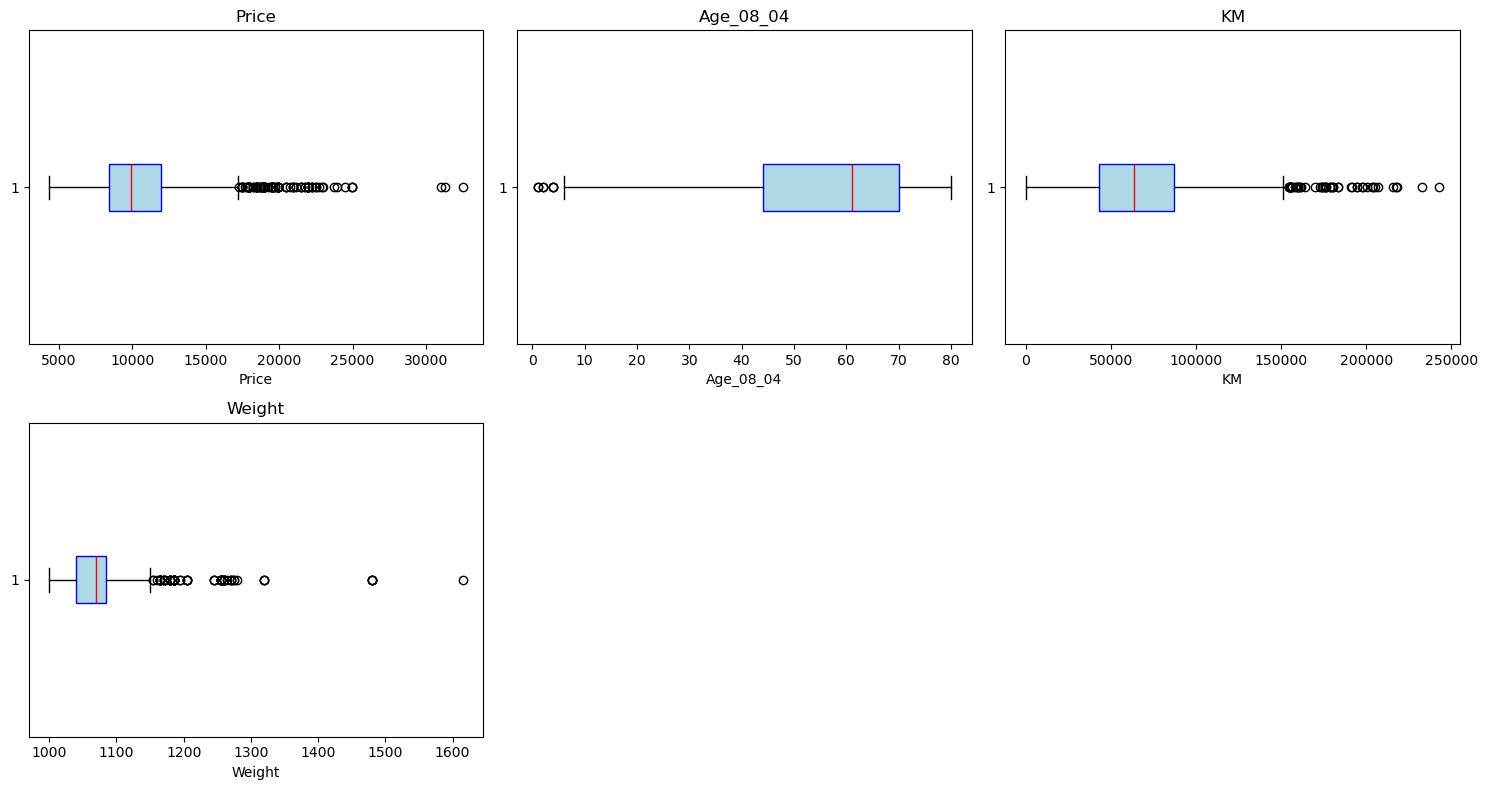

In [180]:
boxplots_por_lotes(df_toyota_continuas,6)


---

### Price

* **Distribución**: el histograma muestra una distribución con pico principal entre \$8 000 y \$12 000, con una larga cola hacia la derecha que llega hasta \$30 000. La curva de densidad confirma ese sesgo positivo.
* **Boxplot**: la mediana está cerca de \$10 000; el IQR va aproximadamente de \$8 000 a \$12 000. Hay muchos valores atípicos por encima de \$15 000, que corresponden a modelos o equipamientos premium.
* **Interpretación**: la mayoría de los coches se cotizan en un rango estrecho, pero existen unos pocos vehículos de alto precio que inflan la cola, por lo que conviene una transformación (por ejemplo, log) o tratar outliers antes de modelar.

---

### Age\_08\_04

* **Distribución**: el histograma es prácticamente creciente desde valores bajos hasta el máximo (\~80), y la densidad señala que hay un acumulado mayor en edades altas. No es simétrica: hay más coches "viejos".
* **Boxplot**: la mediana está en torno a 60–65, el IQR entre \~50 y \~70, con algunos autos muy recientes (cerca de 0) como outliers en la izquierda.
* **Interpretación**: la flota tiende a concentrarse en edades entre 50 y 80 años (o unidades de medida), con pocos vehículos nuevos. Al modelar, podría ser útil agrupar edades muy bajas o muy altas o usar técnicas robustas a outliers.

---

### KM

* **Distribución**: el histograma con KDE presenta un solo pico alrededor de 50 000–75 000 km y luego una cola larga hacia la derecha hasta >200 000 km.
* **Boxplot**: la mediana se sitúa cerca de 75 000 km; el IQR va de \~50 000 a \~100 000 km. Varios outliers por encima de 150 000 km.
* **Interpretación**: la mayoría de los vehículos tienen kilometrajes moderados, pero existe un subgrupo con uso intensivo. Para regresión podría convenir una transformación (raíz o log) y evaluar si recortar o imputar outliers.

---

### Weight

* **Distribución**: el histograma muestra un pico muy marcado entre 1 000 y 1 100 kg, con una cola derecha que llega hasta 1 600 kg; la densidad refleja un sesgo ligero a la derecha.
* **Boxplot**: la mediana ronda 1 050 kg, el IQR entre \~1 015 y \~1 100 kg, con algunos valores muy pesados como outliers.
* **Interpretación**: el peso es bastante homogéneo (la mayoría alrededor de \~1 050 kg), pero hay versiones más pesadas que conviene revisar (p. ej. carrocerías especiales o variante 4×4). Para modelar, quizá baste winsorizar esos pocos valores extremos.

---

**Resumen general**:

* **Precio** y **KM** presentan sesgo positivo y varios outliers altos.
* **Edad** está sesgada hacia valores altos, con pocos coches muy nuevos.
* **Peso** es la más concentrada, aunque con alguna cola derecha.


In [181]:
# Variables enteras

df_toyota_enteras = df.copy()
df_toyota_enteras.drop(
	columns=[
		'Price', 'Quarterly_Tax', 'Weight', 'KM', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS',
		'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
		'Central_Lock', 'Met_Color', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
		'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar',
		'Age_08_04_calculada', 'Fuel_Type', 'Automatic'
	],
	axis=1,
	inplace=True,
	errors='ignore'  # Ignore if any column is missing
)

In [182]:
df_toyota_enteras.describe()

,Age_08_04,Mfg_Month,Mfg_Year,HP,cc,Doors,Gears,Guarantee_Period,Tax_RangeCat
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.0,1436.000000,1436.000000,1436.000000
mean,55.947075,5.548747,1999.625348,101.502089,1576.85585,4.130919,5.026462,3.815460,1.238162
std,18.599988,3.354085,1.540722,14.981080,424.38677,0.991738,0.188510,3.011025,0.709590
min,1.000000,1.000000,1998.000000,69.000000,1300.00000,3.0,3.000000,3.000000,1.000000
25%,44.000000,3.000000,1998.000000,90.000000,1400.00000,3.0,5.000000,3.000000,1.000000
50%,61.000000,5.000000,1999.000000,110.000000,1600.00000,5.0,5.000000,3.000000,1.000000
75%,70.000000,8.000000,2001.000000,110.000000,1600.00000,5.0,5.000000,3.000000,1.000000
max,80.000000,12.000000,2004.000000,192.000000,16000.00000,5.0,6.000000,36.000000,4.000000


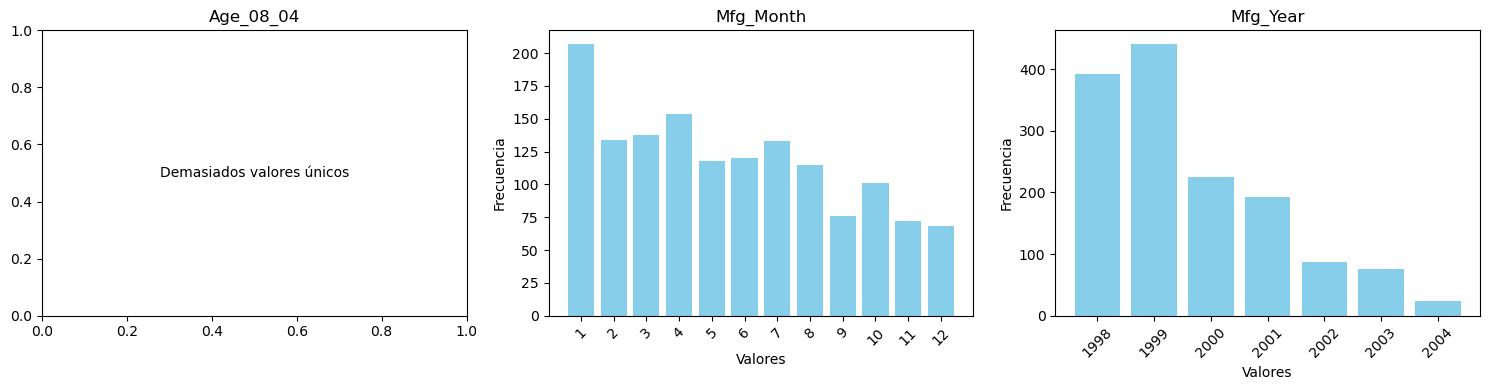

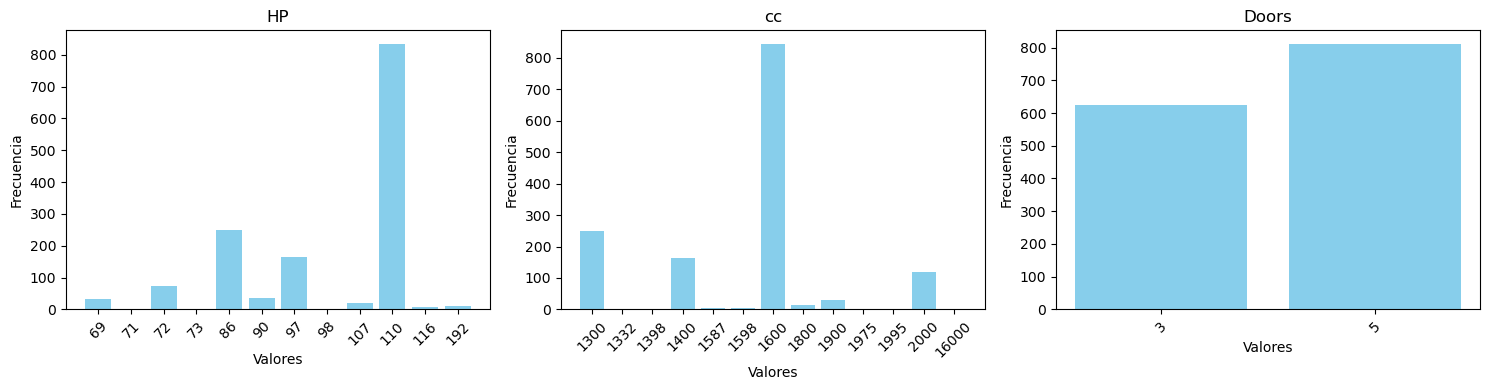

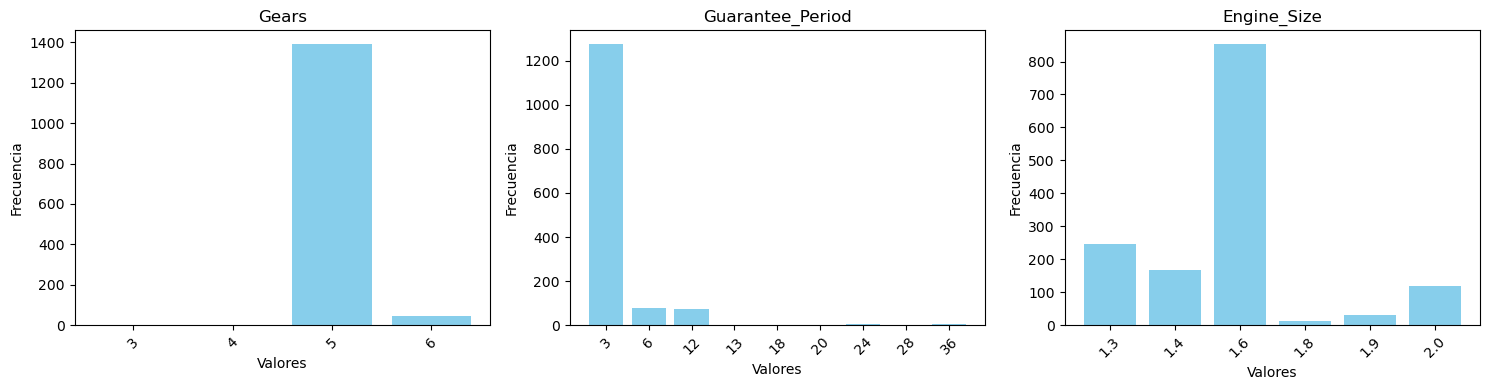

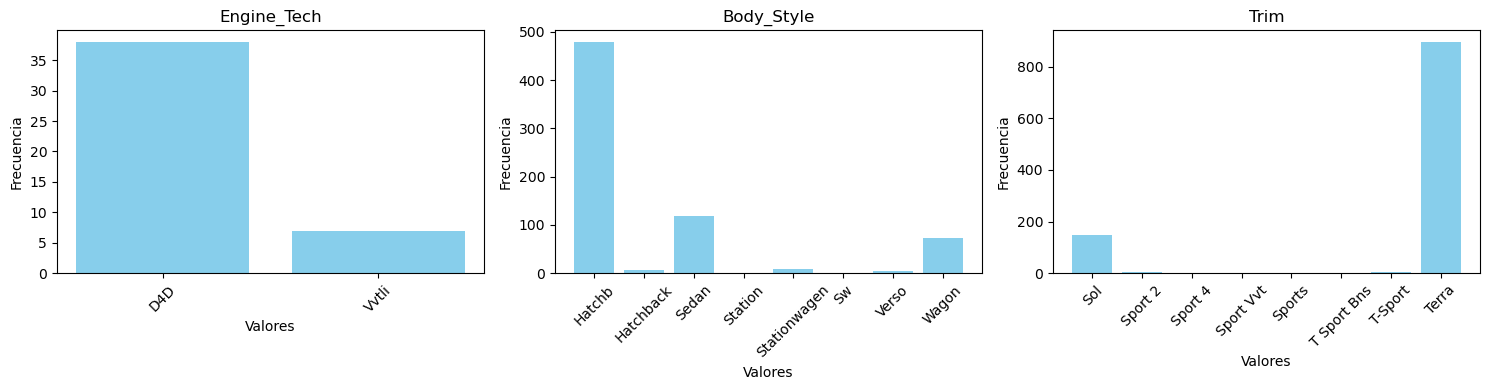

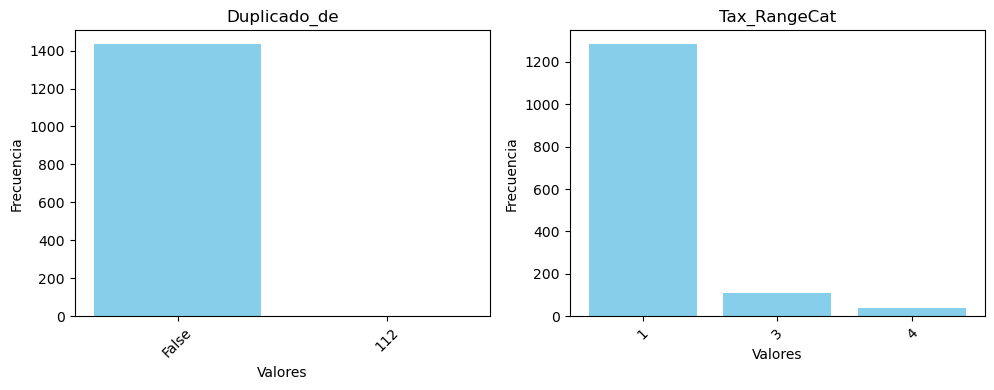

In [183]:
bar_por_lotes(df_toyota_enteras,3)